#### I ) Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#### II ) Importing files

In [2]:
df_train_data = pd.read_csv("train.csv")
df_test_data = pd.read_csv("test.csv")
df_data = df_train_data.append(df_test_data)
print(df_train_data.shape, df_test_data.shape, df_data.shape)

(891, 12) (418, 11) (1309, 12)


#### III ) Exploring data

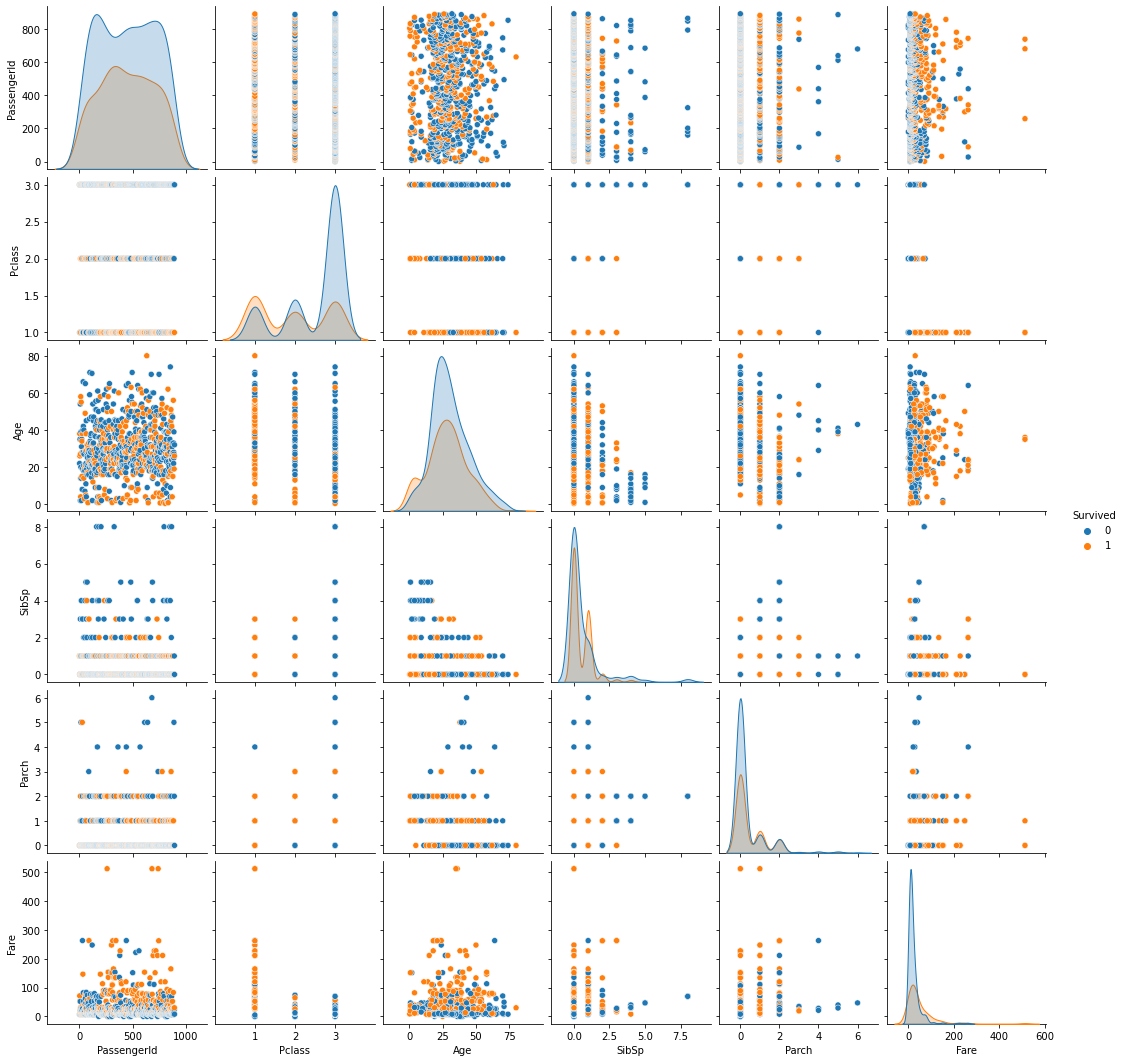

In [3]:
sns.pairplot(df_train_data, hue='Survived');

Looks like Pclass = 1 and more expensive fares bring about a higher chance to survive

In [4]:
df_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


891 passengers : 38% survivors, average age = 30, average fare = 32$

In [5]:
df_test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df_train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
columns = df_data.columns

In [8]:
for col in columns:
    nulls = df_data[col].isnull().sum()
    print('The column ' + col + ' contains ' + str(nulls) +' values')

The column PassengerId contains 0 values
The column Survived contains 418 values
The column Pclass contains 0 values
The column Name contains 0 values
The column Sex contains 0 values
The column Age contains 263 values
The column SibSp contains 0 values
The column Parch contains 0 values
The column Ticket contains 0 values
The column Fare contains 1 values
The column Cabin contains 1014 values
The column Embarked contains 2 values


from the potential relevant categories only 'Age' contains null values * take a look at Cabin as well.

In [9]:
df_train_data[df_train_data['Age'].isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


% survivors for people where age is not indicated is 29% ( vs the overall 38%)

In [10]:
# Ratio < X years survivors

young = df_train_data.loc[df_train_data.Age < 30]["Survived"]
rate_young = sum(young)/len(young)

print("% of young people who survived:", rate_young, sum(young), len(young))

# Ratio >= X years survivors

elder = df_train_data.loc[df_train_data.Age >= 30]["Survived"]
rate_elder = sum(elder)/len(elder)

print("% of elder people who survived:", rate_elder, sum(elder), len(elder))

% of young people who survived: 0.40625 156 384
% of elder people who survived: 0.40606060606060607 134 330


In [11]:
# Ratio men survivors

men = df_train_data.loc[df_train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men, sum(men), len(men))

# Ratio women survivors

women = df_train_data.loc[df_train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women, sum(women), len(women))

% of men who survived: 0.18890814558058924 109 577
% of women who survived: 0.7420382165605095 233 314


In [12]:
# Ratio Class1 survivors

class1 = df_train_data.loc[df_train_data.Pclass == 1]["Survived"]
rate_class1 = sum(class1)/len(class1)

print("% of class1 who survived:", rate_class1, sum(class1), len(class1))

# Ratio Class2 survivors

class2 = df_train_data.loc[df_train_data.Pclass == 2]["Survived"]
rate_class2 = sum(class2)/len(class2)

print("% of class2 who survived:", rate_class2, sum(class2), len(class2))

# Ratio Class3 survivors

class3 = df_train_data.loc[df_train_data.Pclass == 3]["Survived"]
rate_class3 = sum(class3)/len(class3)

print("% of class3 who survived:", rate_class3, sum(class3), len(class3))

% of class1 who survived: 0.6296296296296297 136 216
% of class2 who survived: 0.47282608695652173 87 184
% of class3 who survived: 0.24236252545824846 119 491


Being a woman and the Pclass look like good parameters to estimate if someone survived

#### IV ) Preprocessing data (wrangling and transforming)

In [13]:
#Sex
sex_assignation = {"male":0, "female":1}
df_data['Sex'] = df_data['Sex'].map(sex_assignation)
df_train_data['Sex'] = df_data['Sex'][:891]
df_test_data['Sex'] = df_data['Sex'][891:]

In [14]:
#Dropping not useful categorical columns
df_data = df_data.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis = 1)
df_train_data = df_train_data.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis = 1)
df_test_data = df_test_data.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis = 1)

In [15]:
#Replace age missing values by the median

df_data['Age'].fillna(df_data['Age'].median(), inplace = True)
df_train_data['Age'] = df_data['Age'][:891]
df_test_data['Age'] = df_data['Age'][891:]

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 92.0 KB


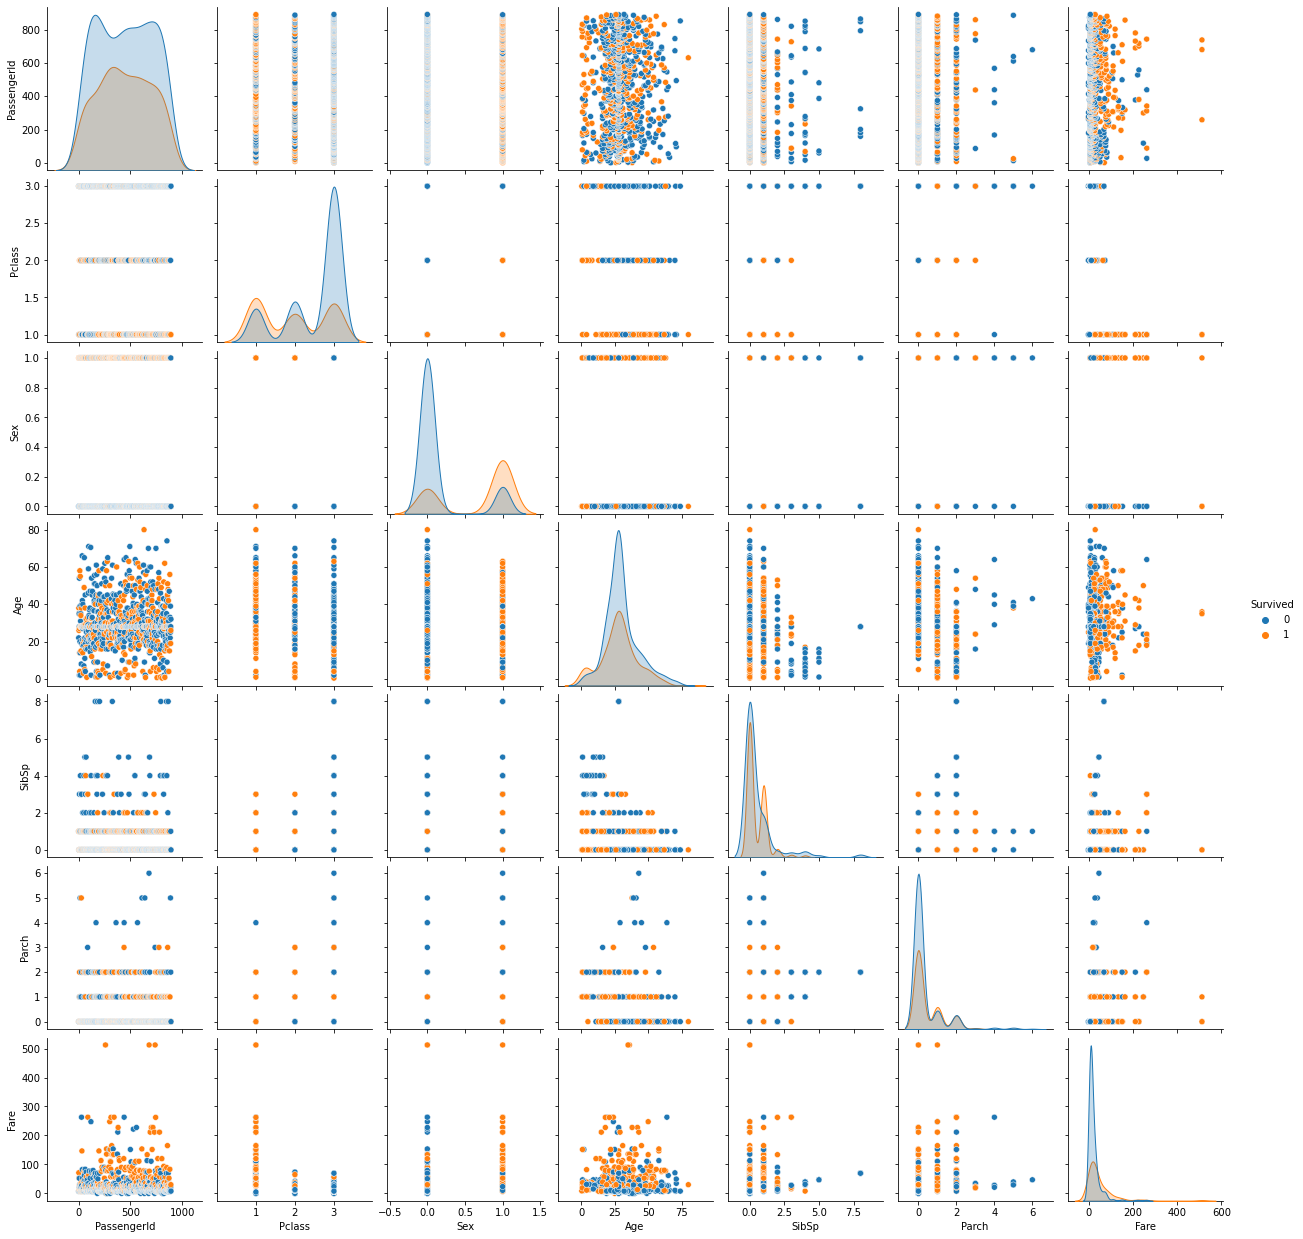

In [17]:
sns.pairplot(df_train_data, hue='Survived');

#### V ) Spliting train and test sets

In [18]:
Features = ['Pclass','Sex','Age','SibSp','Parch','Fare']

X_train, X_test, y_train, y_test = train_test_split(df_train_data[Features], df_train_data['Survived'], test_size = 0.2, random_state=0)


print('Training dataset correctly split into train and test datasets')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Training dataset correctly split into train and test datasets
(712, 6) (712,) (179, 6) (179,)


##### Now let's train different models...

#### A) Logistic Regression Classifier

In [19]:
from sklearn.linear_model import LogisticRegression # importing module

lr = LogisticRegression() # assigning model to an object

lr.fit(X_train, y_train) # fitting the model to the training data

y_pred = lr.predict(X_test) # Predicting the targets applying the model to the test data

from sklearn.metrics import accuracy_score

score = lr.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)

print('The score applying Logistic Regression is ' + str(score*100)+ '%')
print('The accuracy of that score is '+str(accuracy*100))

The score applying Logistic Regression is 79.21348314606742%
The accuracy of that score is 81.00558659217877


###### b) Applying this model to the real test dataset

In [20]:
df_test_data['Fare'] = df_test_data['Fare'].replace(np.nan,0) # Fixed one NaN found in the column 'Fare'

In [21]:
df_test2 = df_test_data.drop('PassengerId', axis= 1) # dropping this column to make the dataframe comparable to the train dataset

In [22]:
y_pred2 = lr.predict(df_test2)

###### c) Creating output

In [23]:
output = pd.DataFrame({'PassengerId': df_test_data.PassengerId, 'Survived': y_pred2})
output.to_csv('my_submission_Log_Reg.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


#### B) Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = svc.score(X_train, y_train)
print('The score applying Support Vector Machine is ' + str(svc_score*100)+ '%')

The score applying Support Vector Machine is 66.43258426966293%


###### b) Applying this model to the real test dataset

In [25]:
y_pred3 = lr.predict(df_test2)

###### c) Creating output

In [26]:
output = pd.DataFrame({'PassengerId': df_test_data.PassengerId, 'Survived': y_pred3})
output.to_csv('my_submission_SVC.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


#### C) K-Neighbors Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_train, y_train)
print('The score applying K-Neighbors is ' + str(knn_score*100)+ '%')

The score applying K-Neighbors is 84.8314606741573%


###### b) Applying this model to the real test dataset

In [28]:
y_pred4 = knn.predict(df_test2)

###### c) Creating output

In [29]:
output = pd.DataFrame({'PassengerId': df_test_data.PassengerId, 'Survived': y_pred4})
output.to_csv('my_submission_KNeighbors.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
